<a href="https://colab.research.google.com/github/GraceHerchenroder/Neuro265/blob/main/homework/coding_homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #5

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, and <code>matplotlib.pyplot as plt</code>.

3. For this assignment, you will be working with the <code>acc_hits_hw5.csv</code> and <code>acc_fa_hw5.csv</code> files in our shared Google Drive folder. Create a *Code Cell* that imports these files as <code>numpy</code> arrays called <code>acc_hits</code> and <code>acc_fa</code>, respectively. To do this, you should upload each file to your personal GitHub repo.

4. Create a *Code Cell* that prints the <code>shape</code> of each array.

5. Both your <code>acc_hits</code> and <code>acc_fa</code> arrays consist of LFP data recorded from the mouse anterior cingulate cortex. Rows of these arrays correspond to separate trials, and columns correspond to samples (timepoints). The task that the mouse was performing is called the **continuous performance test**. This test measures sustained attention. Specifically, the mouse is shaped to respond to a stimulus on a touchscreen. The mouse is rewarded (receives some strawberry milkshake) when it responds to one type of stimulus. This stimulus is called the S+ (it usually looks like horizontal or vertical black and white bars). When the mouse responds to this stimulus, we call that response a **hit**. Your <code>acc_hits</code> variable contains LFP surrounding these hits. In contrast, when the mouse is presented with another stimulus (the S-, which usually looks like a snowflake), it is not supposed to respond. When it does respond, we call that a **false alarm**. Your <code>acc_fa</code> variable contains LFP surrounding these false alarms. So, you have two arrays - one array with LFP recorded during correct choices (hits), and one array with LFP recorded during incorrect choices (false alarms).

6. In a new *Code Cell*, create variable called <code>time</code> that has the same length as <code>acc_hits</code> and <code>acc_fa</code>, with equally spaced values between "zero" and "four" (the length of each trial, in seconds).

7. In a new *Code Cell*, create an expression to determine the sampling rate of the data using the knowledge that you have 8001 samples, and the total length of each sample is 4 seconds.

8. In a new *Code Cell*, plot the first trial of <code>acc_hits</code> in one subplot, and the first trial of <code>acc_fa</code> in another subplot. Plot your <code>time</code> variable on the x-axis. Label your axes.

9. In a new *Markdown Cell*, describe what you think the dominant oscillation (in Hz) in the LFP might be. Does this differ between the first trial of <code>acc_hits</code> and the first trial of <code>acc_fa</code>?

10. We want to have some way to compare LFPs between the two conditions (hits and false alarms). One way to do this might be to compute an event-related potential (ERP) to see if there are structural changes surrounding screen touch for either of the two conditions. In a new *Code Cell*, calculate and plot the ERP for <code>acc_hits</code>. Put <code>time</code> on the x-axis. Put a vertical black line at the "two" position on the x-axis (the screen touch occurred 2 seconds into the sample on each trial). Put a horizontal black line at the "zero" position on the y-axis. Label your axes.

11. In a new *Markdown Cell*, interpret your ERP for hits. Do you see any evidence of consistent activity in the LFP surrounding screen touch (vertical black bar)?

12. Repeat step 10 for <code>acc_fa</code>. Plot your ERP for <code>acc_fa</code> and your ERP for <code>acc_hits</code> in one plot, with <code>time</code> on the x-axis. Make a vertical and horizontal black bar on your plot (as outlined in step 10), and label your axes.

13. In a new *Markdown Cell*, interpret your plot from step 12. Are there any differences in the ERPs between hits and false alarms?

14. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

15. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_5.ipynb</code>.

### Grace Herchenroder
*Neuro265: Intro to Neural Data Analysis*

**22 March 2024**

In [25]:
# Import packages: pandas, numpy, and matplotlib

import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Importing data files

urlfa = 'https://raw.githubusercontent.com/GraceHerchenroder/Neuro265/main/homework/acc_fa_hw5.csv'
urlhits = 'https://raw.githubusercontent.com/GraceHerchenroder/Neuro265/main/homework/acc_hits_hw5.csv'

# import as pd dataframs and convert to numpy arrays to get full range of data points
# may not be most efficienct mechanism, but np.loadtxt did not import properly
acc_fa = np.loadtxt(urlfa, delimiter = ',')
acc_hits = np.loadtxt(urlhits, delimiter = ',')

# verify datatype
print(type(acc_hits), type(acc_fa))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [27]:
# Determining shape of numpy arrays

len_hits, wid_hits = acc_hits.shape #for future use
len_fa, wid_fa = acc_fa.shape
print(acc_fa.shape)
print(acc_hits.shape)

(19, 8001)
(24, 8001)


In [28]:
# Creating time variables for each type

time = np.linspace(0, 4, wid_fa)
time.shape

(8001,)

In [29]:
# Sampling rate using the sample size of 8001 over 4 seconds

sampRate = wid_fa/4
print('The sampling rate is approx ', sampRate, ' Hz.')

The sampling rate is approx  2000.25  Hz.


Text(0, 0.5, 'Voltage [$\\mu V$]')

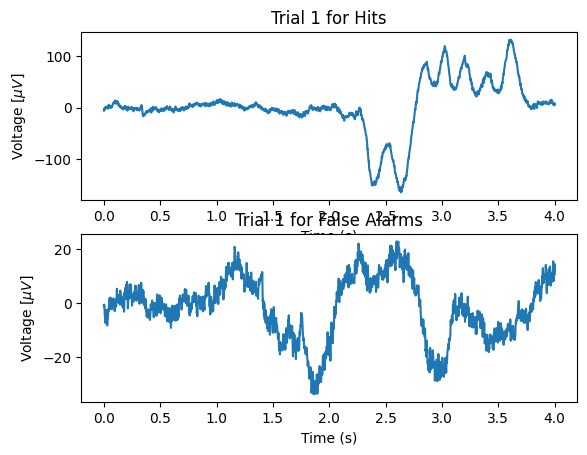

In [30]:
# Plotting initial trials of variables over time

fig, ax = plt.subplots(2, 1)
ax[0].plot(time, acc_hits[0])
ax[0].set_title('Trial 1 for Hits')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Voltage [$\mu V$]')

ax[1].plot(time, acc_fa[0])
ax[1].set_title('Trial 1 for False Alarms')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Voltage [$\mu V$]')

### Dominant Oscillation

I think that the dominant oscillation in the *hits* would be approximately 2 Hz found around the 2.5 second mark. Similarly the dominant oscillation for the false alarms would be approximately 1.5 Hz around the same time. This is because the peaks for the *false alarms* appear to be slightly more spread out. Another observation that I had is that the oscillation for the hits is negative at this time while it is positive for the false alarms.

My interpretation of the dominant oscillation is the smallest frequency between oscillations as this would be when the waves are slowest.

Text(0.5, 1.0, 'ERP of Hit Responses')

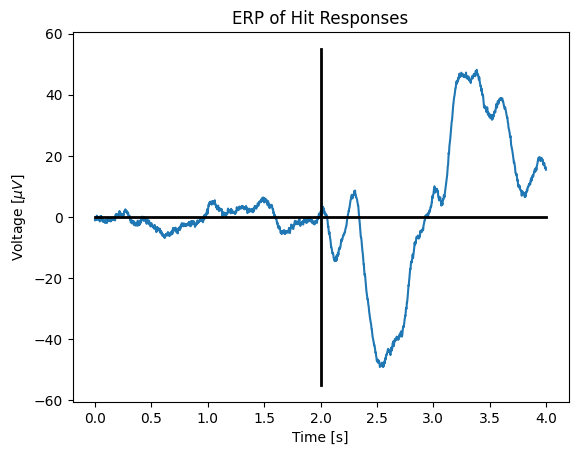

In [31]:
# Ploting the event related potential for the hit response
plt.plot(time, acc_hits.mean(0))        # Plot the ERP of hit response
plt.plot([2, 2], [-55, 55], 'k', lw=2)
plt.plot([0, 4], [0, 0], 'k', lw=2)
plt.xlabel('Time [s]')           # Label the axes
plt.ylabel('Voltage [$\mu V$]')
plt.title('ERP of Hit Responses')  # ... provide a title

### ERP Interpretation

From this visual interpretation it appears that after the screen touch at 2 seconds (indicated by the vertical black line) there seems to be a *change in frequency and amplitude* of the signal. This is indicative of consistent change in the activity of neuron after screen touch occurs on a hit stimulus as we are looking at the mean. Therefore, an event-related potential is most likely occuring for the hit response due to this visual change.

Text(0.5, 1.0, 'ERP of Hit Responses')

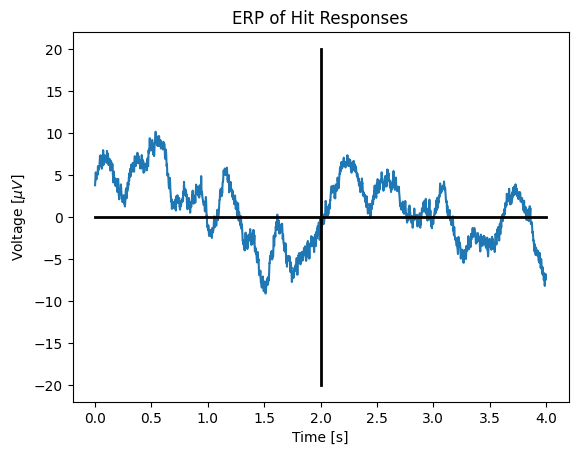

In [32]:
# Ploting the event related potential for the false alarm
plt.plot(time, acc_fa.mean(0))        # Plot the ERP of false alarm response
plt.plot([2, 2], [-20, 20], 'k', lw=2)
plt.plot([0, 4], [0, 0], 'k', lw=2)
plt.xlabel('Time [s]')           # Label the axes
plt.ylabel('Voltage [$\mu V$]')
plt.title('ERP of Hit Responses')  # ... provide a title

### ERP Comparison and Interpretation

In the false alarm response, there does not appear to be any significant change in amplitude or frequency after the screen touch. Overall, in comparison to the hits, the amplitude appears to be consistent across the entire time range. The graph for the false alarm is comparable to that of the hits prior to the screen touch at 2 seconds. This does not show evidence of an event related potential (ERP) from a false alarm.

This difference is highlighted when comparing the graphs for hits and false alarms. The hit shows visible change after the 2 second mark which indicates screen touch whereas the false alarms shows no such change.